In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
def plot_corr(df, fault_type=None, pen=None, ang_inc=None, res=None, threshold=0.5):
    if fault_type is not None:
        df = df[df['Fault type'] == fault_type]
    if pen is not None:
        df = df[df['Pen'] == pen]
    if ang_inc is not None:
        df = df[df['Incidence angle'] == ang_inc]
    if res is not None:
        df = df[df['Fault resistance'] < 30 ]
    df = df.drop(columns=['Fault type', 'Pen', 'Incidence angle', 'Fault resistance', 'Fault location', 'Unnamed: 0'] )
    corr = df.corr(method='pearson')['Fault distance'].drop('Fault distance')
    corr = corr.sort_values(ascending=False).head(16)
    plt.figure(figsize=(16, 3))
    sns.barplot(x=corr.index, hue=corr.index, y=corr.values, palette='coolwarm', legend=False)
    plt.xticks(rotation=60)

def get_Corr(df, fault_type=None, pen=None, ang_inc=None, res=None, threshold=0.5):
    if fault_type is not None:
        df = df[df['Fault type'] == fault_type]
    if pen is not None:
        df = df[df['Pen'] == pen]
    if ang_inc is not None:
        df = df[df['Incidence angle'] == ang_inc]
    if res is not None:
        if isinstance(res, int):
            df = df[df['Fault resistance'] < res ]
        else:
            df = df[(df['Fault resistance'] > res[0])&(df['Fault resistance'] < res[1]) ]
    df = df.drop(columns=['Fault type', 'Pen', 'Incidence angle', 'Fault resistance', 'Fault location', 'Unnamed: 0'] )
    corr = df.corr(method='pearson')['Fault distance'].drop('Fault distance')
    corr = corr.sort_values(ascending=False)#.head(16)
    return corr

In [ ]:
technique = ['Fourier', 'Wavelet', 'Stockwell', 'ThreePhase', 'Emd', 'Vmd']
features = [
    'Energy', 'Entropy', 'RMS Amplitude', 'Kurtosis', 'Skewness', 'SVD', 'Mean', 'Median', 'Standard Deviation', 'Coefficient of Variation', 'Minimum Value', 'Maximum Value', 'Variance'
]
res = {'Technique': []}

paper_tech_names = {
    'Fourier': 'FT',
    'Wavelet': 'WT',
    'Stockwell': 'ST',
    'ThreePhase': 'TT',
    'Emd': 'EMD',
    'Vmd': 'VMD'
}
paper_feature_names = {
    'Energy': 'Energy',
    'Entropy': 'Entropy',
    'RMS Amplitude': 'RMS',
    'Kurtosis': 'Kurtosis',
    'Skewness': 'Skewness',
    'SVD': 'SVD',
    'Mean': 'Mean',
    'Median': 'Median',
    'Standard Deviation': 'Std',
    'Coefficient of Variation': 'C.V.',
    'Minimum Value': 'Min',
    'Maximum Value': 'Max',
    'Variance': 'Var'
}

for tech in technique:
    df = pd.read_csv(f'new_features\\{tech.lower()}_features.csv')
    resistance = 5
    # resistance = [5, 15]
    corr = get_Corr(df, fault_type=11, res=resistance, pen=None)
    res['Technique'].append(paper_tech_names[tech])
    for feature in features:
        cols = [col for col in df.columns if feature in col]
        max_corr = 0
        for col in cols:
            if corr[col] > max_corr:
                max_corr = corr[col]
        if paper_feature_names[feature] not in res:
            res[paper_feature_names[feature]] = []
        res[paper_feature_names[feature]].append(max_corr)
res_df = pd.DataFrame(res)
plt.figure(figsize=(10, 10))
sns.heatmap(res_df.set_index('Technique').T, annot=True, cmap='Blues', fmt=".2f")
plt.xlabel('Pre-Processing Techniques', fontsize=16, fontfamily='Times New Roman')
plt.ylabel('Features', fontsize=16, fontfamily='Times New Roman')
plt.xticks(fontsize=14, fontfamily='Times New Roman')
plt.yticks(fontsize=14, fontfamily='Times New Roman')
plt.savefig('corr_PPP_0.pdf', bbox_inches='tight')
# plt.savefig('corr_heatmap.png', bbox_inches='tight', dpi=300)

In [ ]:
technique = ['Fourier', 'Wavelet', 'Stockwell', 'ThreePhase', 'Emd', 'Vmd']
features = [
    'Energy', 'Entropy', 'RMS Amplitude', 'Kurtosis', 'Skewness', 'SVD', 'Mean', 'Median', 'Standard Deviation', 'Coefficient of Variation', 'Minimum Value', 'Maximum Value', 'Variance'
]
res = {'Technique': []}

paper_tech_names = {
    'Fourier': 'FT',
    'Wavelet': 'WT',
    'Stockwell': 'ST',
    'ThreePhase': 'TT',
    'Emd': 'EMD',
    'Vmd': 'VMD'
}
paper_feature_names = {
    'Energy': 'Energy',
    'Entropy': 'Entropy',
    'RMS Amplitude': 'RMS',
    'Kurtosis': 'Kurtosis',
    'Skewness': 'Skewness',
    'SVD': 'SVD',
    'Mean': 'Mean',
    'Median': 'Median',
    'Standard Deviation': 'Std',
    'Coefficient of Variation': 'C.V.',
    'Minimum Value': 'Min',
    'Maximum Value': 'Max',
    'Variance': 'Var'
}

for resistance in [5, [5,15]]:
    for fault_type in [1, 4, 8, 11]:
        faul_type_name = {1: 'PG', 4: 'PP', 8: 'PPG', 11: 'PPP'}
        res = {'Technique': []}
        for tech in technique:
            df = pd.read_csv(f'new_features\\{tech.lower()}_features.csv')
            corr = get_Corr(df, fault_type=fault_type, res=resistance, pen=None)
            res['Technique'].append(paper_tech_names[tech])
            for feature in features:
                cols = [col for col in df.columns if feature in col]
                max_corr = 0
                for col in cols:
                    if np.abs(corr[col]) > max_corr:
                        max_corr = np.abs(corr[col])
                if paper_feature_names[feature] not in res:
                    res[paper_feature_names[feature]] = []
                res[paper_feature_names[feature]].append(max_corr)
        res_df = pd.DataFrame(res)
        plt.figure(figsize=(10, 10))
        sns.heatmap(res_df.set_index('Technique').T, annot=True, cmap='Blues', fmt=".2f",
                    annot_kws={"size": 16}, cbar=False)
        plt.xlabel('Pre-Processing Techniques', fontsize=18, fontfamily='Times New Roman')
        plt.ylabel('Features', fontsize=18, fontfamily='Times New Roman')
        plt.xticks(fontsize=16, fontfamily='Times New Roman')
        plt.yticks(fontsize=16, fontfamily='Times New Roman')
        res_name = 0 if isinstance(resistance, int) else 10
        plt.savefig(f'corr_{faul_type_name[fault_type]}_{res_name}.pdf', bbox_inches='tight')
        plt.close()

In [11]:
df = pd.read_csv(f'new_features\\{tech.lower()}_features.csv')
df['Fault resistance'].unique()

array([1.0e-03, 1.0e+01, 2.5e+01, 4.0e+01, 5.0e+01])

In [15]:

boxplot_data = {
    'Technique': [],
    'Correlation': [],
    'Resistance': [],
    'Fault Type': []
}


for resistance in [5, 10, 25, 40, 50]:
    for fault_type in [1, 4, 8, 11]:
        faul_type_name = {1: 'PG', 4: 'PP', 8: 'PPG', 11: 'PPP'}
        res = {'Technique': []}
        for tech in technique:
            df = pd.read_csv(f'new_features\\{tech.lower()}_features.csv')
            corr = get_Corr(df, fault_type=fault_type, res=resistance, pen=None)
            res['Technique'].append(paper_tech_names[tech])
            for feature in features:
                cols = [col for col in df.columns if feature in col]
                max_corr = 0
                for col in cols:
                    if np.abs(corr[col]) > max_corr:
                        max_corr = np.abs(corr[col])
                if paper_feature_names[feature] not in res:
                    res[paper_feature_names[feature]] = []
                res[paper_feature_names[feature]].append(max_corr)
        res_df = pd.DataFrame(res)
        for tech in technique:
            for feature in features:
                boxplot_data['Technique'].append(paper_tech_names[tech])
                boxplot_data['Correlation'].append(res_df[res_df['Technique'] == paper_tech_names[tech]][paper_feature_names[feature]].values[0])
                boxplot_data['Resistance'].append(resistance)
                boxplot_data['Fault Type'].append(faul_type_name[fault_type])
boxplot_df = pd.DataFrame(boxplot_data)

C:\Users\alail\AppData\Local\Temp\ipykernel_31012\1878827823.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['Resistance'] = plot_df['Resistance'].astype(str) + ' $\Omega$'


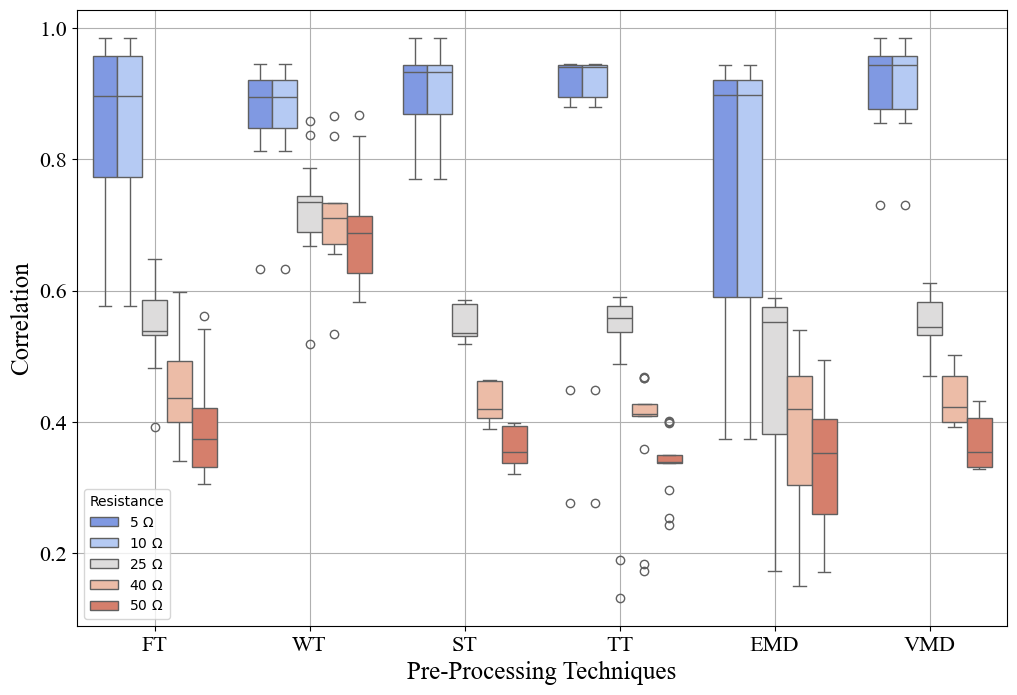

In [30]:
plt.figure(figsize=(12, 8))
# plot_df = boxplot_df[boxplot_df['Resistance'] == 10]
plot_df = boxplot_df[boxplot_df['Fault Type'] == 'PG']
# plot_df = boxplot_df.copy()
# Add the ohm symbol to the resistance
plot_df['Resistance'] = plot_df['Resistance'].astype(str) + ' $\Omega$'
sns.boxplot(data=plot_df, x='Technique', y='Correlation', hue='Resistance', palette='coolwarm')
plt.grid()
plt.xticks(fontsize=16, fontfamily='Times New Roman')
plt.yticks(fontsize=16, fontfamily='Times New Roman')
plt.xlabel('Pre-Processing Techniques', fontsize=18, fontfamily='Times New Roman')
plt.ylabel('Correlation', fontsize=18, fontfamily='Times New Roman')
plt.savefig('boxplot.pdf', bbox_inches='tight')
# plt.close()

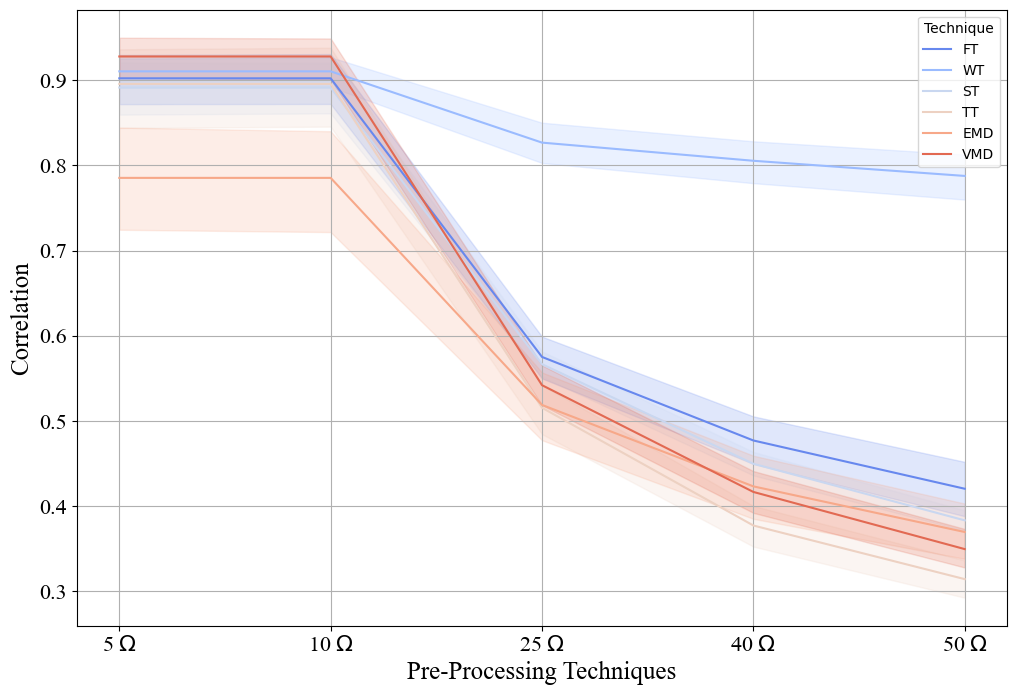

In [32]:
# I want a Line plot where x axis is the resistance, hue is the technique, y axis is the correlation, and the line is the fault type

plt.figure(figsize=(12, 8))
# plot_df = boxplot_df[boxplot_df['Resistance'] == 10]
# plot_df = boxplot_df[boxplot_df['Fault Type'] == 'PG']
plot_df = boxplot_df.copy()
# Add the ohm symbol to the resistance
plot_df['Resistance'] = plot_df['Resistance'].astype(str) + ' $\Omega$'
sns.lineplot(data=plot_df, x='Resistance', y='Correlation', hue='Technique', palette='coolwarm')
plt.grid()
plt.xticks(fontsize=16, fontfamily='Times New Roman')
plt.yticks(fontsize=16, fontfamily='Times New Roman')
plt.xlabel('Pre-Processing Techniques', fontsize=18, fontfamily='Times New Roman')
plt.ylabel('Correlation', fontsize=18, fontfamily='Times New Roman')
plt.savefig('LinePlot.pdf', bbox_inches='tight')

In [ ]:
technique = ['Fourier', 'Wavelet', 'Stockwell', 'ThreePhase', 'Emd', 'Vmd']

for tech in technique:
    df = pd.read_csv(f'new_features\\{tech.lower()}_features.csv')
    pen = 25
    ang_inc = 0.1
    res = 15
    plot_corr(df, fault_type=1, pen=None, ang_inc=ang_inc, res=res, threshold=0.9)
    plt.title(f'{tech} - PEN: {pen} - Ang: {ang_inc} - Pearson Correlation')
    plt.xlabel('Features')
    plt.ylabel('Correlation Coefficient')
    plt.grid(True)
    plt.savefig(f'correlation\\{tech}_pen{pen}_ang{ang_inc}.svg', format='svg', dpi=1200, bbox_inches='tight')
    plt.show()

In [ ]:
for tech in technique:
    df = pd.read_csv(f'new_features\\{tech.lower()}_features.csv')
    plot_corr(df, fault_type=1, pen=None, ang_inc=None, res=None, threshold=0.7)
    plt.title(f'{tech} - Pearson Correlation')
    plt.xlabel('Features')
    plt.ylabel('Correlation Coefficient')
    plt.grid(True)
    plt.savefig(f'correlation\\{tech}_all.svg', format='svg', dpi=1200, bbox_inches='tight')
    plt.show()